<a href="https://colab.research.google.com/github/ValerieLangat/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Valerie_Langat_Linear_Algebra_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg
from numpy import array
import math
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

(0, 4)

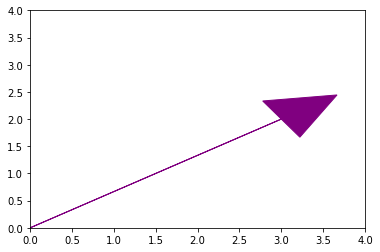

In [3]:
a = [3, 2]

plt.arrow(0,0,*a, head_width=.5, head_length=.5, color='purple')
plt.xlim(0,4)
plt.ylim(0,4)

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [4]:
b = [17, -4, -2, 1]

linalg.norm(b)

17.60681686165901

The norm gives a vector is length or size

## 1.3 Find $\vec{c} \cdot \vec{d}$ - Are these vectors orthogonal? Why or why not?

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [5]:
c = np.array([3, 7, -2, 12])
d = np.array([9, -7, 4, 6])

print(np.dot(c, d))

42


Not orthogonal because the dot product isn't equal to 0.

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [6]:
#E Transpose:
E = np.array([[7, 4, 2],
    [1, 3, -1],
    [2, 6, -4]])
np.matrix.transpose(E)

array([[ 7,  1,  2],
       [ 4,  3,  6],
       [ 2, -1, -4]])

In [7]:
#E Inverse
print(np.linalg.inv(E))

[[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]]


# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [8]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [9]:
df.describe()

,customers,snow
count,7.000000,7.000000
mean,1135.714286,2.714286
std,314.264069,2.927700
min,760.000000,0.000000
25%,905.000000,0.500000
50%,1080.000000,1.000000
75%,1350.000000,5.000000
max,1600.000000,7.000000


In [10]:
print("Customer Mean: ", 1135.714286)
print("Customer Stdev: ", 314.264069)

print("Snow Mean: ", 2.714286)
print("Snow Stdev: ", 2.927700)

Customer Mean:  1135.714286
Customer Stdev:  314.264069
Snow Mean:  2.714286
Snow Stdev:  2.9277


In [11]:
#Variance of Customers
np.var(customers)

84653.06122448981

In [12]:
#Variance of Snow
np.var(snow)

7.346938775510203

## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

In [0]:
#They are not comparable because they are not measured and reported in the same units

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [16]:
df.cov()

,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


In [13]:
np.cov(df['customers'], df['snow'])

array([[9.87619048e+04, 6.70238095e+02],
       [6.70238095e+02, 8.57142857e+00]])

# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [17]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [21]:
scaler.fit(df.drop('Country', axis=1))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
targets = df['Country']

In [23]:
sdf = pd.DataFrame(scaler.transform(df.drop('Country', axis=1)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
print(pca.fit(sdf))
print('Eigenvectors: \n', pca.components_)
print('Eigenvalues: \n', pca.explained_variance_)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
Eigenvectors: 
 [[-0.24572131  0.28562914 -0.26481055 -0.28611787 -0.12719487 -0.2811012
   0.09775901 -0.26544997 -0.28708628 -0.12073819 -0.25767815 -0.27890521
  -0.17843996 -0.27747513  0.22771961 -0.25509484 -0.25275834]
 [ 0.24708041 -0.07716993  0.13610704 -0.01100602 -0.40054501 -0.13684092
  -0.45468785 -0.0964863  -0.09282322  0.41036129 -0.1539603   0.08174644
  -0.32902948 -0.13773847  0.29323981  0.23231808  0.21105701]]
Eigenvalues: 
 [15.48765084  5.63749203]


In [31]:
prodf = pca.transform(sdf)

print('Projected Data: \n', prodf[:17])

Projected Data: 
 [[-0.95448984  0.32831832]
 [-4.52095094 -1.73537967]
 [ 0.48797835  3.23367195]
 [ 4.98746242 -1.8266106 ]]


In [49]:
compon = pd.DataFrame(prodf)
final = pd.concat([compon, targets], axis=1)
final = final.rename(columns={0:'Principal Comp 1', 1: 'Principal Comp 2'})

final.head()

,Principal Comp 1,Principal Comp 2,Country
0,-0.954490,0.328318,England
1,-4.520951,-1.735380,Wales
2,0.487978,3.233672,Scotland
3,4.987462,-1.826611,North Ireland


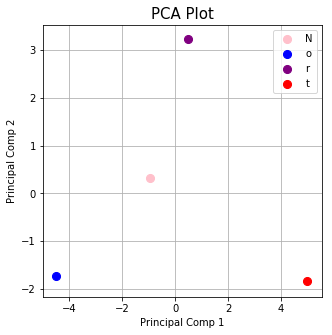

In [75]:
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Comp 1', fontsize = 10)
ax.set_ylabel('Principal Comp 2', fontsize = 10)
ax.set_title('PCA Plot', fontsize = 15)

target = ['England', 'Wales', 'Scotland', 'North Ireland',]
colors = ['pink', 'blue', 'purple', 'red']

for target, color in zip(target,colors):
    indicesToKeep = final['Country'] == target
    ax.scatter(final.loc[indicesToKeep, 'Principal Comp 1']
               , final.loc[indicesToKeep, 'Principal Comp 2']
               , c = color
               , s = 65)
    
ax.legend(target)
ax.grid()

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [0]:
from sklearn.cluster import KMeans

In [0]:
import sklearn

In [51]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [0]:
scaled = sklearn.preprocessing.scale(points)

In [0]:
pca2 = PCA(2)
pca.fit(scaled)
M = pca.transform(scaled)

In [69]:
points.describe()

,x,y
count,200.000000,200.000000
mean,-2.323298,-3.422869
std,4.556513,5.580888
min,-10.118473,-11.095795
25%,-4.619520,-8.246848
50%,-3.373794,-5.307697
75%,-0.427175,3.360028
max,7.807885,5.883054


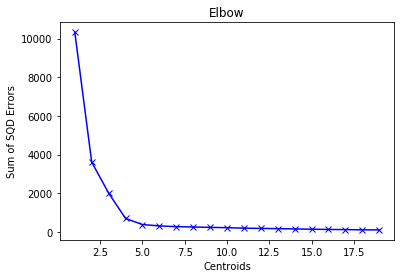

In [70]:
ss = []
K = range(1,20)

for k in K:
  km = KMeans (n_clusters=k)
  km = km.fit(points) 
  ss.append(km.inertia_)
  
plt.plot(K, f, 'bx-')
plt.xlabel('Centroids')
plt.ylabel('Sum of SQD Errors')
plt.title('Elbow')
plt.show()

In [0]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(M)
labeling = kmeans.labels_
centers = kmeans.cluster_centers_

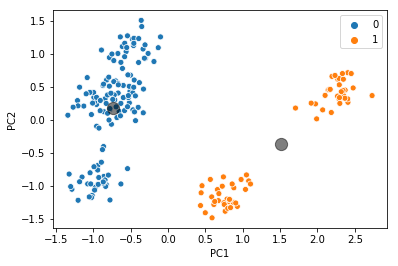

In [74]:
ax = sns.scatterplot(*M.T, labeling);
plt.scatter(*centers.T,c='black', s=150, alpha=.5);

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.show();